<a href="https://colab.research.google.com/github/XG11/ECE420FinalProject/blob/main/ECE420Phase4OpenCV%2BSVMmethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.ndimage import gaussian_filter, gaussian_gradient_magnitude
from scipy.spatial.distance import euclidean
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
from PIL import Image
import numpy as np

# Upload multiple images at once
uploaded_images = files.upload()

# Initialize a list to store images
images_np = []

# Iterate over the uploaded files
for image_path in uploaded_images.keys():
    # Open the image, convert it to grayscale, and convert to numpy array
    image = Image.open(image_path).convert('L')
    image_np = np.array(image, dtype=np.float32)
    images_np.append(image_np)

# Now images_np contains all the uploaded images as numpy arrays
print(f'Uploaded {len(images_np)} images.')


Saving imge1.jpg to imge1.jpg
Saving imge2.jpg to imge2.jpg
Saving imge3.jpg to imge3.jpg
Saving imge4.jpg to imge4.jpg
Saving imge5.jpg to imge5.jpg
Saving imge6.jpg to imge6.jpg
Saving imge7.jpg to imge7.jpg
Saving imge8.jpg to imge8.jpg
Saving imge9.jpg to imge9.jpg
Saving imge10.jpg to imge10.jpg
Saving imge11.jpg to imge11.jpg
Saving imge12.jpg to imge12.jpg
Saving n1.jpg to n1.jpg
Saving n2.jpg to n2.jpg
Saving n3.jpg to n3.jpg
Saving n4.jpg to n4.jpg
Saving n5.jpg to n5.jpg
Uploaded 17 images.


In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



#create SIFT object
sift = cv2.SIFT_create()
#put in training images into this variable
image_paths_train = ['img2.jpg','img3.jpg','img4.jpg','img5.jpg','img6.jpg','img7.jpg','img8.jpg','img9.jpg','n1.jpg','n2.jpg','n3.jpg','n4.jpg','n5.jpg','s1.jpg', 's2.jpg', 's3.jpg', 's4.jpg', 's5.jpg', 's6.jpg', 's7.jpg']
# Find descriptors for each image and append to descriptor train vector
descriptors_train = []
for img_path in image_paths_train:
  image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  keypoints, descriptors = sift.detectAndCompute(image, None)
  descriptors_train.append(descriptors)
#size(descriptors_train) = #keypoints in each image added up
descriptors_train = np.vstack(descriptors_train)
#Once you gather All descriptors Perform Kmeans Algorithm
vocabulary_size = 1000
kmeans = KMeans(n_clusters=vocabulary_size, random_state=0)
kmeans.fit(descriptors_train)

centroids_arr = kmeans.cluster_centers_
#put in test images into this variable
image_paths_test = ['imge1.jpg','imge2.jpg','imge3.jpg','imge4.jpg','imge5.jpg','imge6.jpg','imge7.jpg','imge8.jpg','imge9.jpg','imge10.jpg','imge11.jpg','imge12.jpg','img5.jpg']

hist_arr_train = [] #stores histograms for all training images

hist_arr_test = [] #stores histograms for all test images

#Find descriptors for each image and append to descriptor test vector
#making histograms for training images
for img_path in image_paths_train:
  image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  keypoints, descriptors = sift.detectAndCompute(image, None)
  k_means_labels = kmeans.predict(descriptors)
  hist = np.zeros(vocabulary_size)
  for label in k_means_labels:
    hist[label] += 1
  hist /= hist.sum()
  hist_arr_train.append(hist)


#making histograms for test images
for img_path in image_paths_test:
  image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  keypoints, descriptors = sift.detectAndCompute(image, None)
  k_means_labels = kmeans.predict(descriptors)
  hist = np.zeros(vocabulary_size)
  for label in k_means_labels:
    hist[label] += 1
  hist /= hist.sum()
  hist_arr_test.append(hist)


#SVM Classification
X_train = np.array(hist_arr_train).astype(np.float32)


svm_classifier = cv2.ml.SVM_create()
svm_classifier.setType(cv2.ml.SVM_C_SVC)
svm_classifier.setKernel(cv2.ml.SVM_RBF)
svm_classifier.setC(1)
svm_classifier.setGamma(1/X_train.shape[1])
svm_classifier.setDegree(3)
svm_classifier.setCoef0(0)




y_train = np.ones(len(image_paths_train)).astype(np.int32)
y_train[-12:] = 0

svm_classifier.train(X_train, cv2.ml.ROW_SAMPLE, y_train)
svm_classifier.save('svm_model.xml')

X_test = np.array(hist_arr_test).astype(np.float32)

y_test = np.zeros(len(image_paths_test)).astype(np.int32)
y_test[len(image_paths_test) - 1] = 1

predicted_labels = svm_classifier.predict(X_test)[1]
predicted_labels = predicted_labels.flatten()  # Reshape to a 1D array
print(predicted_labels)
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")




KeyboardInterrupt: 

In [ ]:
# Train SVM and save model to XML
import cv2
import numpy as np
from sklearn.metrics import accuracy_score

# Define training and test data
X_train = np.array(hist_arr_train).astype(np.float32)
y_train = np.ones(len(image_paths_train)).astype(np.int32)
y_train[-12:] = 0  # Adjust labels as per your data

X_test = np.array(hist_arr_test).astype(np.float32)
y_test = np.zeros(len(image_paths_test)).astype(np.int32)
y_test[-1] = 1  # Adjust test labels if needed

# Initialize and configure OpenCV SVM
svm_classifier = cv2.ml.SVM_create()
svm_classifier.setType(cv2.ml.SVM_C_SVC)
svm_classifier.setKernel(cv2.ml.SVM_RBF)  # Use RBF kernel
svm_classifier.setC(1.0)
svm_classifier.setGamma(1 / X_train.shape[1])

# Train the SVM
svm_classifier.train(X_train, cv2.ml.ROW_SAMPLE, y_train)

# Save the trained model to XML
svm_classifier.save('svm_model.xml')
print("SVM model has been saved as svm_model.xml")

# Predict on test data
_, predicted_labels = svm_classifier.predict(X_test)
predicted_labels = predicted_labels.flatten()  # Convert to 1D array

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")


SVM model has been saved as svm_model.xml
Accuracy: 92.31%


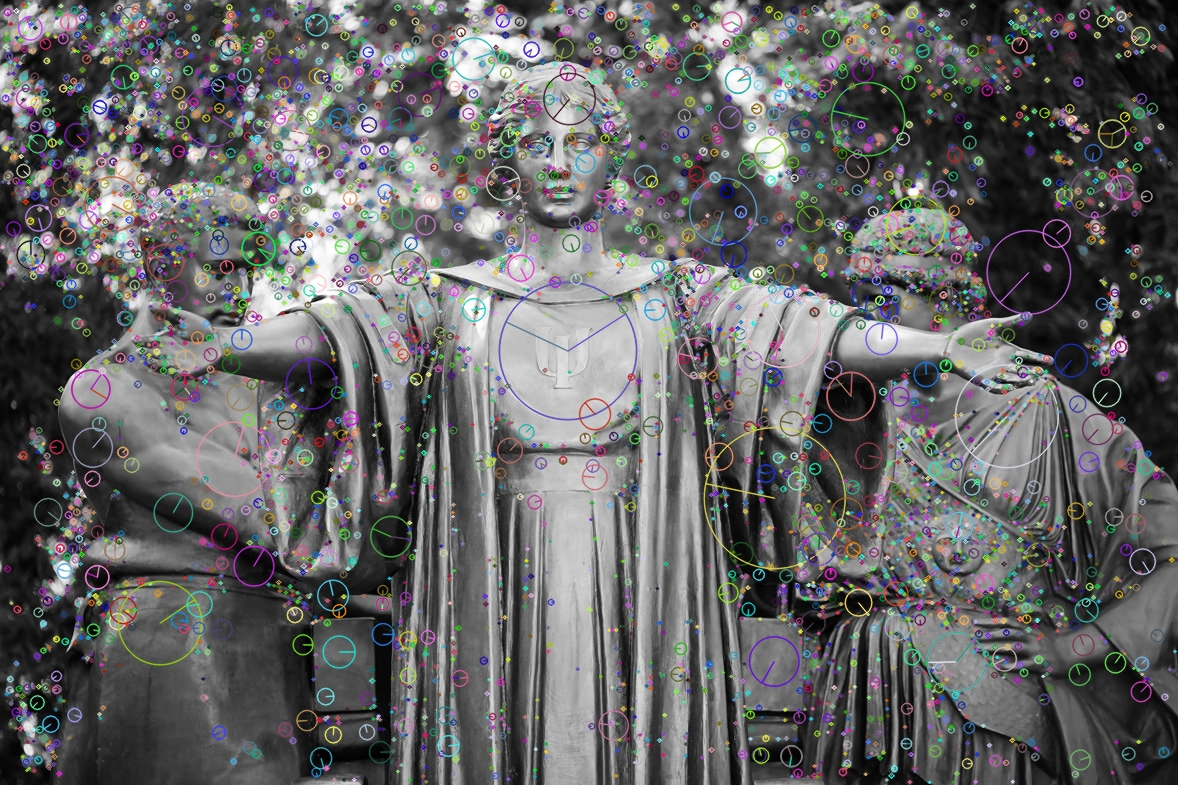

In [ ]:
image = cv2.imread(image_paths_train[0], cv2.IMREAD_GRAYSCALE)
keypoints, descriptors = sift.detectAndCompute(image, None)
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2_imshow(image_with_keypoints)


In [16]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

img1 = cv2.imread('Stop1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('stop2.jpg', cv2.IMREAD_GRAYSCALE)


#create SIFT object
sift = cv2.SIFT_create()
#put in training images into this variable
image_paths_train = ['img2.jpg','img3.jpg','img4.jpg','img5.jpg','img6.jpg','img7.jpg','img8.jpg','img9.jpg','n1.jpg','n2.jpg','n3.jpg','n4.jpg','n5.jpg','s1.jpg', 's2.jpg', 's3.jpg', 's4.jpg', 's5.jpg', 's6.jpg', 's7.jpg']
# Find descriptors for each image and append to descriptor train vector
descriptors_train = []
for img_path in image_paths_train:
  image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  keypoints, descriptors = sift.detectAndCompute(image, None)
  descriptors_train.append(descriptors)
#size(descriptors_train) = #keypoints in each image added up
descriptors_train = np.vstack(descriptors_train)
#Once you gather All descriptors Perform Kmeans Algorithm
vocabulary_size = 300
kmeans = KMeans(n_clusters=vocabulary_size, random_state=0)
kmeans.fit(descriptors_train)

centroids_arr = kmeans.cluster_centers_

print(centroids_arr)
# Assuming centroids_arr is your 2D numpy array from KMeans
java_array_code = "double[][] centroids = " + str(centroids_arr.tolist()).replace('[', '{').replace(']', '}') + ";"

# Save to a .java file
with open("Centroids.java", "w") as f:
    f.write(java_array_code)

#put in test images into this variable
image_paths_test = ['imge1.jpg','imge2.jpg','imge3.jpg','imge4.jpg','imge5.jpg','imge6.jpg','imge7.jpg','imge8.jpg','imge9.jpg','imge10.jpg','imge11.jpg','imge12.jpg','imge12.jpg']

hist_arr_train = [] #stores histograms for all training images

hist_arr_test = [] #stores histograms for all test images

#Find descriptors for each image and append to descriptor test vector
#making histograms for training images
for img_path in image_paths_train:
  image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  keypoints, descriptors = sift.detectAndCompute(image, None)
  k_means_labels = kmeans.predict(descriptors)
  hist = np.zeros(vocabulary_size)
  for label in k_means_labels:
    hist[label] += 1
  hist /= hist.sum()
  hist_arr_train.append(hist)


#making histograms for test images
for img_path in image_paths_test:
  image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  keypoints, descriptors = sift.detectAndCompute(image, None)
  k_means_labels = kmeans.predict(descriptors)
  hist = np.zeros(vocabulary_size)
  for label in k_means_labels:
    hist[label] += 1
  hist /= hist.sum()
  hist_arr_test.append(hist)







[[47.627907  15.791758   5.9841356 ...  2.7521734  2.539648  23.659424 ]
 [17.830547  10.335444  22.691118  ... 12.116575  12.397788  17.90746  ]
 [14.413834  19.414936  24.413708  ... 13.857834  19.332445  22.539373 ]
 ...
 [17.887783  11.562476  11.936434  ... 12.369619  14.096375  21.672365 ]
 [20.00859   21.805342  23.600002  ...  7.0709887  9.419279  14.125782 ]
 [22.354559  22.06885   23.65314   ... 25.116932  29.535187  33.9039   ]]


In [14]:
#SVM Classification
svm_classifier = SVC(kernel='poly')

X_train = np.array(hist_arr_train)

y_train = np.ones(len(image_paths_train))
y_train[-12:] = 0

svm_classifier.fit(X_train, y_train)

X_test = np.array(hist_arr_test)

y_test = np.zeros(len(image_paths_test))
y_test[len(image_paths_test) - 1] = 1

predicted_labels = svm_classifier.predict(X_test)
print(predicted_labels)
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Accuracy: 84.62%


In [15]:
import cv2
import numpy as np
from sklearn.metrics import accuracy_score

# Normalize histograms for OpenCV
X_train_normalized = X_train / (np.linalg.norm(X_train, axis=1, keepdims=True) + 1e-6)
X_test_normalized = X_test / (np.linalg.norm(X_test, axis=1, keepdims=True) + 1e-6)

# Train OpenCV SVM
svm_opencv = cv2.ml.SVM_create()
svm_opencv.setType(cv2.ml.SVM_C_SVC)
svm_opencv.setKernel(cv2.ml.SVM_POLY)
svm_opencv.setC(svm_classifier.C)
svm_opencv.setDegree(svm_classifier.degree)
svm_opencv.setGamma(svm_classifier._gamma)  # Match gamma from scikit-learn

svm_opencv.train(X_train_normalized.astype(np.float32), cv2.ml.ROW_SAMPLE, y_train.astype(np.int32))

# Save the OpenCV-trained model
svm_opencv.save('svm_model.xml')
print("SVM model has been saved as svm_model.xml")

# Predict using the saved OpenCV model
loaded_svm = cv2.ml.SVM_load('svm_model.xml')
_, predictions_opencv = loaded_svm.predict(X_test_normalized.astype(np.float32))

# Evaluate accuracy
predictions_opencv = predictions_opencv.flatten()
accuracy_opencv = accuracy_score(y_test, predictions_opencv)
print(f"Predictions: {predictions_opencv}")
print(f"Accuracy of OpenCV SVM: {accuracy_opencv * 100:.2f}%")



SVM model has been saved as svm_model.xml
Predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Accuracy of OpenCV SVM: 92.31%
